# Лабораторная работа 5. Эвристические алгоритмы

## Вариант 1 / Ананикян Тигран 

### Задание 1 

а) Используя волновой алгоритм вручную построить оптимальный путь через лабиринт.

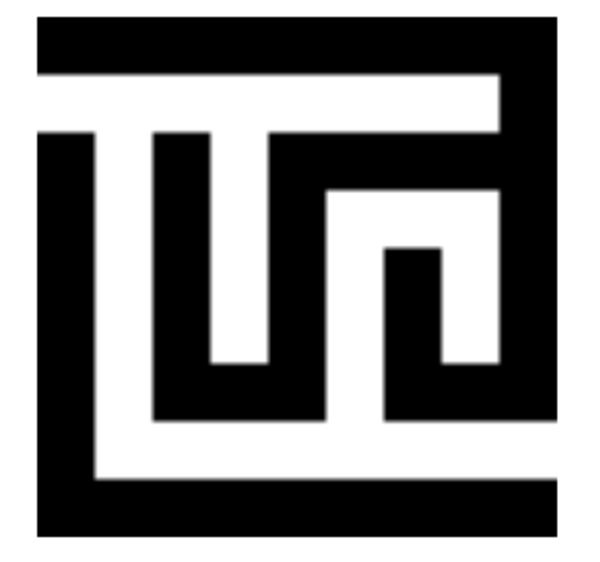

In [3]:
from IPython.display import Image
Image(filename='Desktop/Лабиринт 1.png')

In [4]:
## Wave_algorithm

maze = [
    [1, 1, 1, 1, 1, 1, 1, 1, 1], #1
    [0, 0, 0, 0, 0, 0, 0, 0, 1], #2
    [1, 0, 1, 0, 1, 1, 1, 1, 1], #3
    [1, 0, 1, 0, 1, 0, 0, 0, 1], #4
    [1, 0, 1, 0, 1, 0, 1, 0, 1], #5
    [1, 0, 1, 0, 1, 0, 1, 0, 1], #6
    [1, 0, 1, 1, 1, 0, 1, 1, 1], #7
    [1, 0, 0, 0, 0, 0, 0, 0, 0], #8
    [1, 1, 1, 1, 1, 1, 1, 1, 1], #9
]

start = (1, 0)
end = (7, 8)

### Creating wave-map
wave = [[-1 for j in range(len(maze[0]))] for i in range(len(maze))]
wave[start[0]][start[1]] = 0

queue = [start]

while queue:
    x, y = queue.pop(0)
    for dx, dy in [(0, 1), (1, 0), (0, -1), (-1, 0)]:
        nx, ny = x + dx, y + dy
        if 0 <= nx < len(maze) and 0 <= ny < len(maze[0]) and wave[nx][ny] == -1 and maze[nx][ny] == 0:
            wave[nx][ny] = wave[x][y] + 1
            queue.append((nx, ny))

### Creating a path
path = [end]
x, y = end
while wave[x][y] != 0:
    for dx, dy in [(0, 1), (1, 0), (0, -1), (-1, 0)]:
        nx, ny = x + dx, y + dy
        if 0 <= nx < len(maze) and 0 <= ny < len(maze[0]) and wave[nx][ny] == wave[x][y] - 1:
            x, y = nx, ny
            path.append((x, y))
            break

path.reverse()

if path is None:
    print("Error in path")
else:
    print("Optimal path:", path)

Optimal path: [(1, 0), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (7, 2), (7, 3), (7, 4), (7, 5), (7, 6), (7, 7), (7, 8)]


б) Используя маршрутный алгоритм вручную построить оптимальный путь через лабиринт.

In [5]:
## Route algorithm

from queue import Queue

maze = [
    [1, 1, 1, 1, 1, 1, 1, 1, 1], #1
    [0, 0, 0, 0, 0, 0, 0, 0, 1], #2
    [1, 0, 1, 0, 1, 1, 1, 1, 1], #3
    [1, 0, 1, 0, 1, 0, 0, 0, 1], #4
    [1, 0, 1, 0, 1, 0, 1, 0, 1], #5
    [1, 0, 1, 0, 1, 0, 1, 0, 1], #6
    [1, 0, 1, 1, 1, 0, 1, 1, 1], #7
    [1, 0, 0, 0, 0, 0, 0, 0, 0], #8
    [1, 1, 1, 1, 1, 1, 1, 1, 1], #9
]

def find_path(maze):
    start = (1, 0)
    end = (7, 8)
    q = Queue()
    q.put(start)
    visited = set()
    prev = {}
    while not q.empty():
        curr = q.get()
        if curr == end:
            break
        neighbors = [(curr[0]-1, curr[1]), (curr[0]+1, curr[1]), (curr[0], curr[1]-1), (curr[0], curr[1]+1)]
        for neighbor in neighbors:
            if neighbor[0] < 0 or neighbor[0] >= len(maze) or neighbor[1] < 0 or neighbor[1] >= len(maze[0]):
                continue
            if maze[neighbor[0]][neighbor[1]] == 1:
                continue
            if neighbor in visited:
                continue
            visited.add(neighbor)
            q.put(neighbor)
            prev[neighbor] = curr
    if end not in prev:
        return None
    path = []
    curr = end
    while curr != start:
        path.append(curr)
        curr = prev[curr]
    path.append(start)
    path.reverse()
    return path

path = find_path(maze)

if path is None:
    print("Error in path")
else:
    print("Optimal path:", path)

Optimal path: [(1, 0), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (7, 2), (7, 3), (7, 4), (7, 5), (7, 6), (7, 7), (7, 8)]


Решение алгоритма:

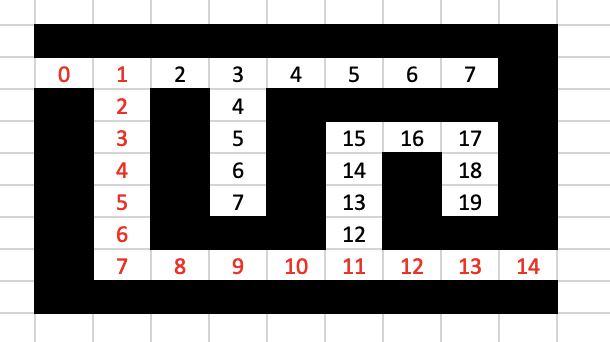

In [7]:
from IPython.display import Image
Image(filename='Desktop/Лабиринт 2.png')

### Задание 2

Реализовать марштутный алгоритм с евклидовым расстоянием, построить оптимальный путь через лабиринт.

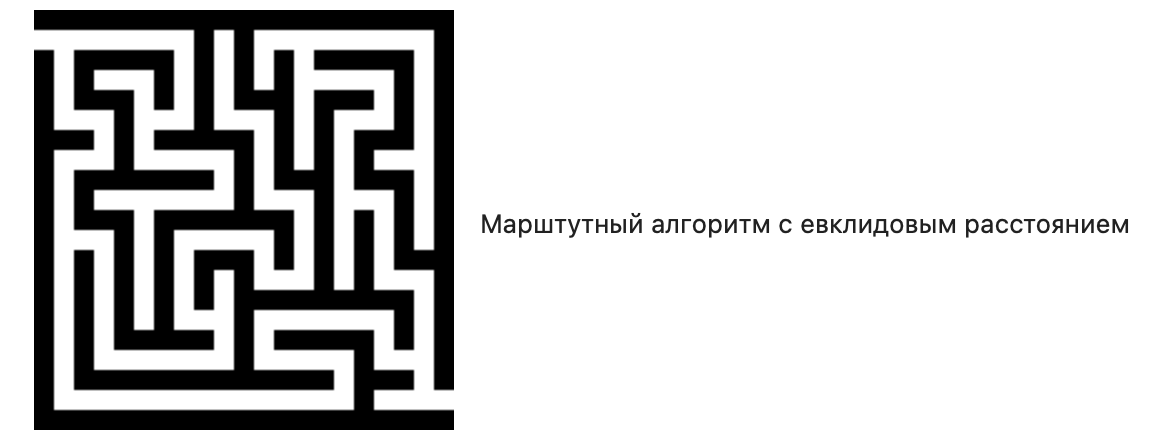

In [8]:
from IPython.display import Image
Image(filename='Desktop/Лабиринт 3.png')

In [9]:
import math

def euclidean_distance(point1, point2):
    x1, y1 = point1
    x2, y2 = point2
    return math.sqrt((x2 - x1) ** 2 + (y2 - y1) ** 2)


def get_neighboring_cells(point):
    x, y = point
    return [(x-1, y), (x+1, y), (x, y-1), (x, y+1), (x-1, y-1), (x-1, y+1), (x+1, y-1), (x+1, y+1)]


def astar(maze, start, goal):
    open_set = {start}
    came_from = {}
    g_score = {start: 0}
    f_score = {start: euclidean_distance(start, goal)}
    while open_set:
        current = min(open_set, key=lambda x: f_score[x])

        if current == goal:
            path = [current]
            while current in came_from:
                current = came_from[current]
                path.append(current)
            path.reverse()
            return path

        open_set.remove(current)

        for neighbor in get_neighboring_cells(current):
            nx, ny = neighbor

            if 0 <= nx < len(maze) and 0 <= ny < len(maze[0]) and maze[nx][ny] != '#':
                tentative_g_score = g_score[current] + 1

                if neighbor not in g_score or tentative_g_score < g_score[neighbor]:
                    came_from[neighbor] = current
                    g_score[neighbor] = tentative_g_score
                    f_score[neighbor] = tentative_g_score + euclidean_distance(neighbor, goal)
                    open_set.add(neighbor)

    return None


maze = [['#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#'],  # Это был ужас
        [' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', '#', ' ', '#', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', '#'],
        ['#', ' ', '#', '#', '#', '#', '#', ' ', '#', ' ', '#', ' ', '#', ' ', '#', '#', '#', '#', '#', ' ', '#'],
        ['#', ' ', '#', ' ', ' ', ' ', '#', ' ', '#', ' ', '#', ' ', '#', ' ', ' ', ' ', ' ', ' ', '#', ' ', '#'],
        ['#', ' ', '#', '#', '#', ' ', '#', ' ', '#', ' ', '#', '#', '#', ' ', '#', '#', '#', ' ', '#', ' ', '#'],
        ['#', ' ', ' ', ' ', '#', ' ', ' ', ' ', '#', ' ', ' ', ' ', '#', ' ', '#', ' ', ' ', ' ', '#', ' ', '#'],
        ['#', '#', '#', ' ', '#', ' ', '#', '#', '#', '#', '#', ' ', '#', ' ', '#', ' ', '#', '#', '#', ' ', '#'],
        ['#', ' ', ' ', ' ', '#', ' ', ' ', ' ', ' ', ' ', '#', ' ', '#', ' ', '#', ' ', '#', ' ', ' ', ' ', '#'],
        ['#', ' ', '#', '#', '#', '#', '#', '#', '#', ' ', '#', ' ', '#', '#', '#', ' ', '#', '#', '#', ' ', '#'],
        ['#', ' ', '#', ' ', ' ', ' ', ' ', ' ', ' ', ' ', '#', ' ', ' ', ' ', '#', ' ', ' ', ' ', '#', ' ', '#'],
        ['#', ' ', '#', '#', '#', ' ', '#', '#', '#', '#', '#', '#', '#', ' ', '#', ' ', '#', ' ', '#', ' ', '#'],
        ['#', ' ', ' ', ' ', '#', ' ', '#', ' ', ' ', ' ', ' ', ' ', '#', ' ', '#', ' ', '#', ' ', '#', ' ', '#'],
        ['#', ' ', '#', ' ', '#', ' ', '#', ' ', '#', '#', '#', ' ', '#', ' ', '#', ' ', '#', ' ', '#', '#', '#'],
        ['#', ' ', '#', ' ', '#', ' ', '#', ' ', '#', ' ', '#', ' ', ' ', ' ', '#', ' ', '#', ' ', ' ', ' ', '#'],
        ['#', ' ', '#', ' ', '#', ' ', '#', ' ', '#', ' ', '#', '#', '#', '#', '#', '#', '#', '#', '#', ' ', '#'],
        ['#', ' ', '#', ' ', '#', ' ', '#', ' ', ' ', ' ', '#', ' ', ' ', ' ', ' ', ' ', ' ', ' ', '#', ' ', '#'],
        ['#', ' ', '#', ' ', '#', '#', '#', '#', '#', ' ', '#', ' ', '#', '#', '#', '#', '#', ' ', '#', ' ', '#'],
        ['#', ' ', '#', ' ', ' ', ' ', ' ', ' ', ' ', ' ', '#', ' ', ' ', ' ', ' ', ' ', '#', ' ', ' ', ' ', '#'],
        ['#', ' ', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', ' ', '#', '#', '#', ' ', '#'],
        ['#', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', '#', ' ', ' ', ' ', ' '],
        ['#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#']]

start = (1, 0)
goal = (19, 20)

path = astar(maze, start, goal)

if path:
    print("Путь найден: ", path, '\n')
    for step in path:
        x, y = step
        maze[x][y] = '.'

    for row in maze:
        print(' '.join(row))
else:
    print("Путь не найден.")

Путь найден:  [(1, 0), (2, 1), (3, 1), (4, 1), (5, 2), (6, 3), (7, 2), (8, 1), (9, 1), (10, 1), (11, 2), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 2), (19, 3), (19, 4), (19, 5), (19, 6), (19, 7), (19, 8), (19, 9), (19, 10), (19, 11), (19, 12), (19, 13), (19, 14), (18, 15), (17, 14), (17, 13), (17, 12), (16, 11), (15, 12), (15, 13), (15, 14), (15, 15), (15, 16), (16, 17), (17, 18), (18, 19), (19, 20)] 

# # # # # # # # # # # # # # # # # # # # #
.               #   #                   #
# . # # # # #   #   #   #   # # # # #   #
# . #       #   #   #   #           #   #
# . # # #   #   #   # # #   # # #   #   #
#   .   #       #       #   #       #   #
# # # . #   # # # # #   #   #   # # #   #
#   .   #           #   #   #   #       #
# . # # # # # # #   #   # # #   # # #   #
# . #               #       #       #   #
# . # # #   # # # # # # #   #   #   #   #
#   .   #   #           #   #   #   #   #
# . #   #   #   # # #   #   #   #   # # #
# . #   #   #   #   # 